In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [2]:
dataset = pd.read_csv("Clean2019Data.csv")
dataset.shape

(254972, 21)

In [3]:
train, test = train_test_split(dataset, test_size = 0.2)

In [4]:
# Class count
HD_0, HD_1 = train['HeartDiseaseorAttack'].value_counts()

# Divide by class
HD_class_0 = train[train['HeartDiseaseorAttack'] == 0]
HD_class_1 = train[train['HeartDiseaseorAttack'] == 1]

print(f"No Heart Disease: {HD_0}")
print(f"Has Heart Disease: {HD_1}")

# Oversample people with heart disease for test case
df_class_1_over = HD_class_1.sample(HD_0, replace=True)
df_test_over = pd.concat([HD_class_0, df_class_1_over], axis=0)

df_test_over.shape

No Heart Disease: 185573
Has Heart Disease: 18404


(371146, 21)

In [5]:
X_train = df_test_over.iloc[:,1:11]
y_train = df_test_over[['HeartDiseaseorAttack']]

X_test = test.iloc[:,1:11]
y_test = test[['HeartDiseaseorAttack']]

# Oversampling with decision tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6960172007781305

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.771663888616531



<AxesSubplot:>

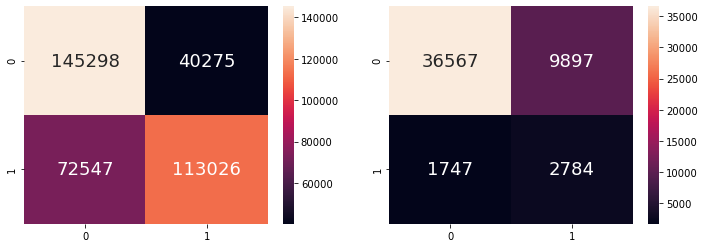

In [6]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [7]:
CM_train = confusion_matrix(y_train, y_train_pred)
CM_test = confusion_matrix(y_test, y_test_pred)

FP = CM_test.sum(axis=0) - np.diag(CM_test)  
FN = CM_test.sum(axis=1) - np.diag(CM_test)
TP = np.diag(CM_test)
TN = CM_test.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

print(f"The true positive rate is: {TPR[1]}")

The true positive rate is: 0.6144338998013683


### Using Logistic Regression

In [8]:
lr = LogisticRegression(solver = 'lbfgs', max_iter= 254972)

In [9]:
train_predictors = train.iloc[:,1:]
train_response = train[['HeartDiseaseorAttack']]
train_response.shape

(203977, 1)

In [10]:
test_predictors = test.iloc[:,1:]
test_response = test[['HeartDiseaseorAttack']]
test_response.shape

(50995, 1)

In [11]:
lr.fit(train_predictors, train_response.values.ravel())
print(f"Logistic Regression with 1 Predictor gives a score of {lr.score(train_predictors, train_response)} for the train set.")

Logistic Regression with 1 Predictor gives a score of 0.9115439485824383 for the train set.


<AxesSubplot:>

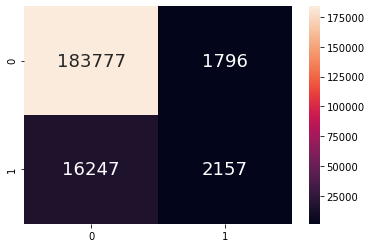

In [12]:
HD_train_predict = lr.predict(train_predictors)
cm = confusion_matrix(train_response, HD_train_predict)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

Logistic Regression with 1 Predictor gives a score of 0.913030689283263 for the test set.


<AxesSubplot:>

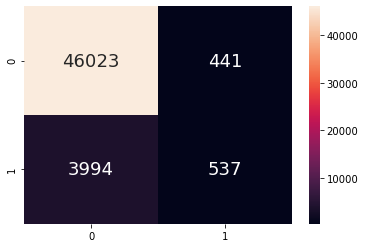

In [13]:
lr.fit(test_predictors, test_response.values.ravel())
print(f"Logistic Regression with 1 Predictor gives a score of {lr.score(test_predictors, test_response)} for the test set.")
HD_test_predict = lr.predict(test_predictors)
cm = confusion_matrix(test_response, HD_test_predict)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

In [14]:
CM_train = confusion_matrix(train_response, HD_train_predict)
CM_test = confusion_matrix(test_response, HD_test_predict)

FP = CM_test.sum(axis=0) - np.diag(CM_test)  
FN = CM_test.sum(axis=1) - np.diag(CM_test)
TP = np.diag(CM_test)
TN = CM_test.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

print(f"The true positive rate is: {TPR[1]}")

The true positive rate is: 0.11851688369013463


In [15]:
dectree.score(X_test, y_test) - lr.score(test_predictors, test_response)

-0.14136680066673202

## Using SMOTE

In [17]:
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score


Logistic Regression with 1 Predictor gives a score of 0.7159917638984215 for the train set.


<AxesSubplot:>

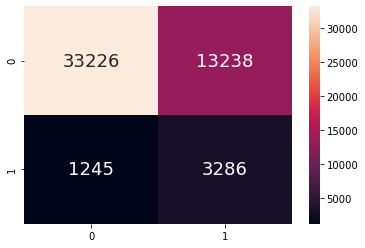

In [19]:
sm = SMOTE(sampling_strategy = 'minority')
Xsm_train, ysm_train = sm.fit_resample(X_train, y_train)

smote = LogisticRegression(solver='liblinear').fit(Xsm_train, ysm_train.values.ravel())

smote_pred = smote.predict(X_test)

# Checking accuracy
print(f"Logistic Regression with 1 Predictor gives a score of {accuracy_score(test_response, smote_pred)} for the train set.")
cm = confusion_matrix(test_response, smote_pred)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

In [21]:
CM_test = confusion_matrix(test_response, smote_pred)

FP = CM_test.sum(axis=0) - np.diag(CM_test)  
FN = CM_test.sum(axis=1) - np.diag(CM_test)
TP = np.diag(CM_test)
TN = CM_test.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

print(f"The true positive rate is: {TPR[1]}")

The true positive rate is: 0.7252262193776209
